## Latent position two-graph testing

In [48]:
import numpy as np

from graspy.inference import LatentPositionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline

### Generate SBM to model as an RDPG

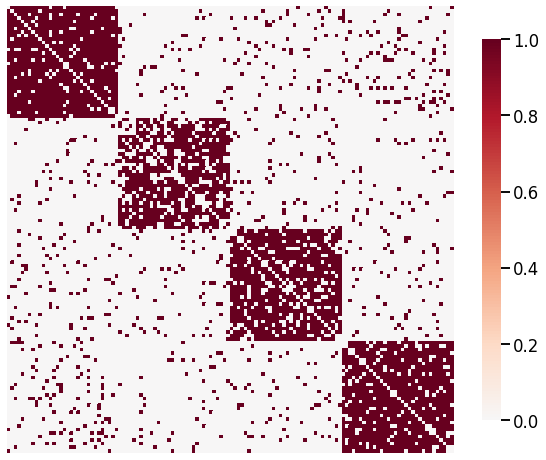

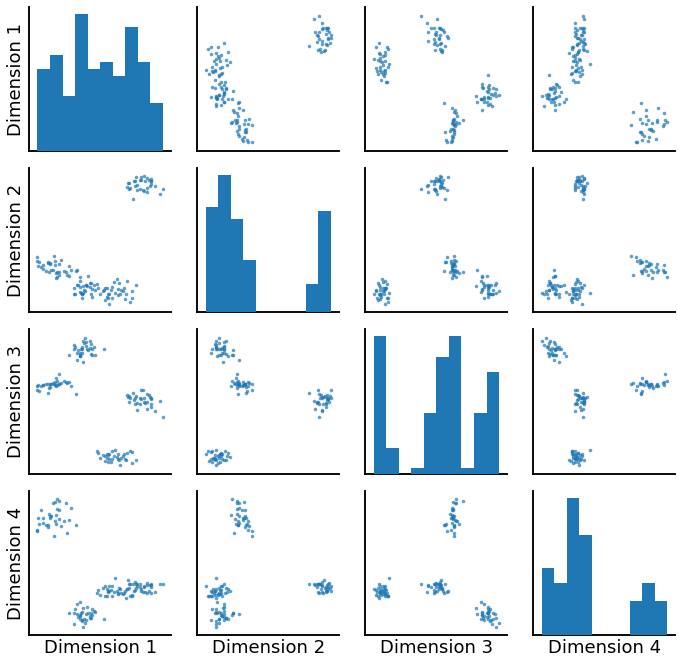

In [49]:
# generate an SBM
n_components = 4
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1],
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
n = [32] * n_components
A = sbm(n, P)
X = AdjacencySpectralEmbed(n_components).fit_transform(A)

heatmap(A)
pairplot(X)

### Sample new RDPGs from latent position

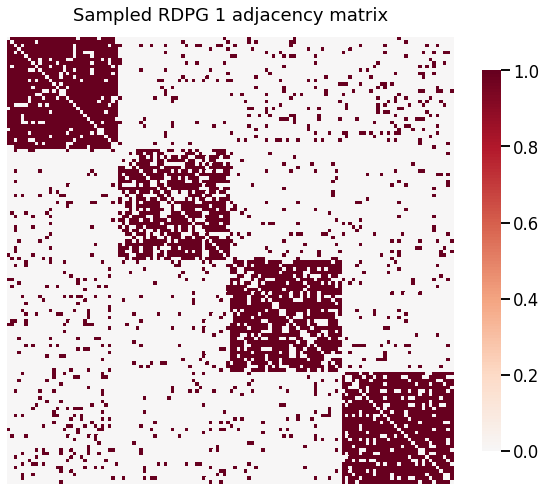

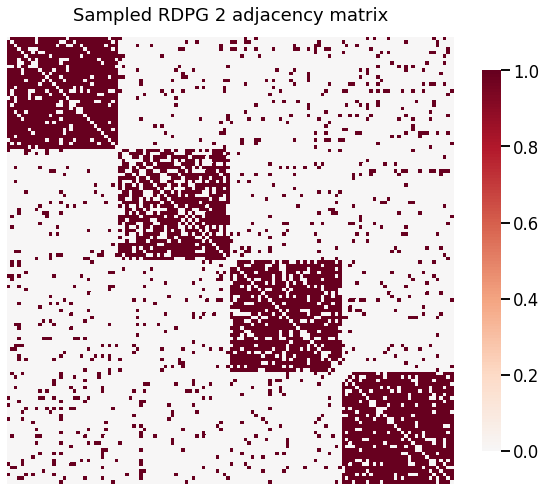

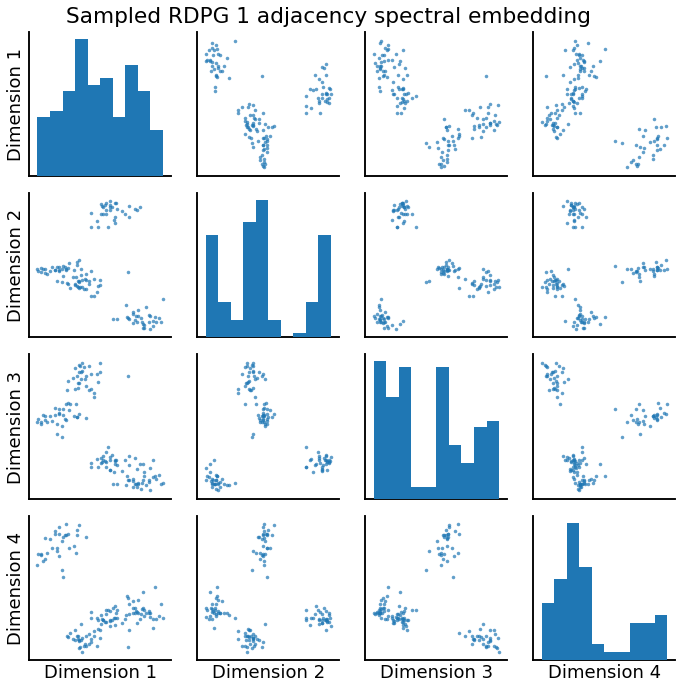

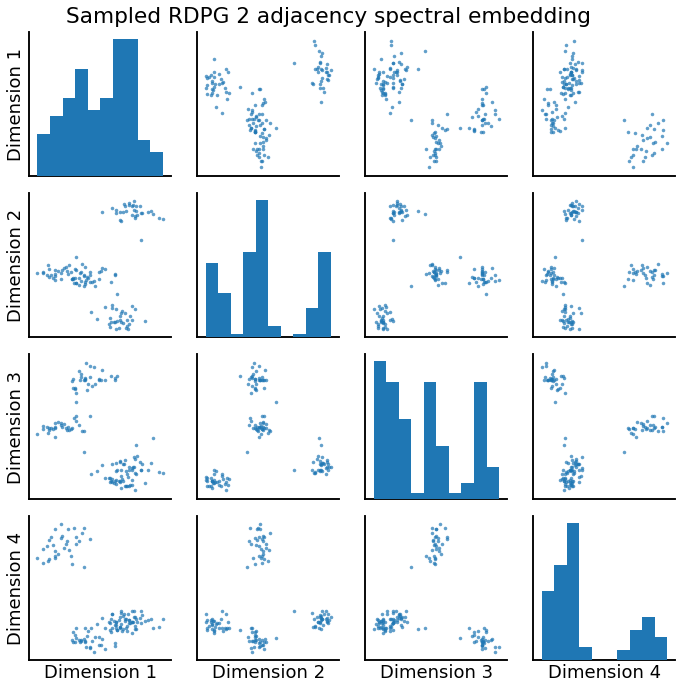

In [57]:
A1 = rdpg(X)
A2 = rdpg(X)

Xhat1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A1)
Xhat2 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A2)

heatmap(A1, title='Sampled RDPG 1 adjacency matrix')
heatmap(A2, title='Sampled RDPG 2 adjacency matrix')
pairplot(Xhat1, title='Sampled RDPG 1 adjacency spectral embedding')
pairplot(Xhat2, title='Sampled RDPG 2 adjacency spectral embedding')

## Latent position test where null is true

In [58]:
lpt = LatentPositionTest(n_bootstraps=100, n_components=n_components)
lpt.fit(A1, A2)

LatentPositionTest(embedding='ase', n_bootstraps=100, n_components=4,
                   test_case='rotation')

In [59]:
lpt.p_value_

0.693069306930693

### make null false

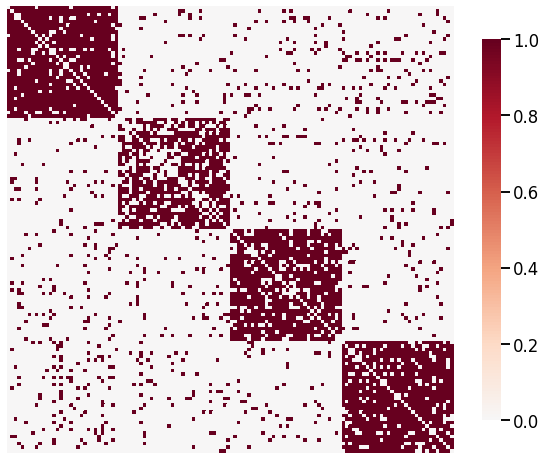

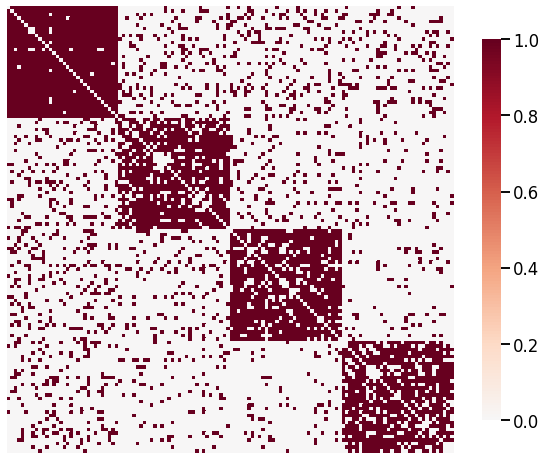

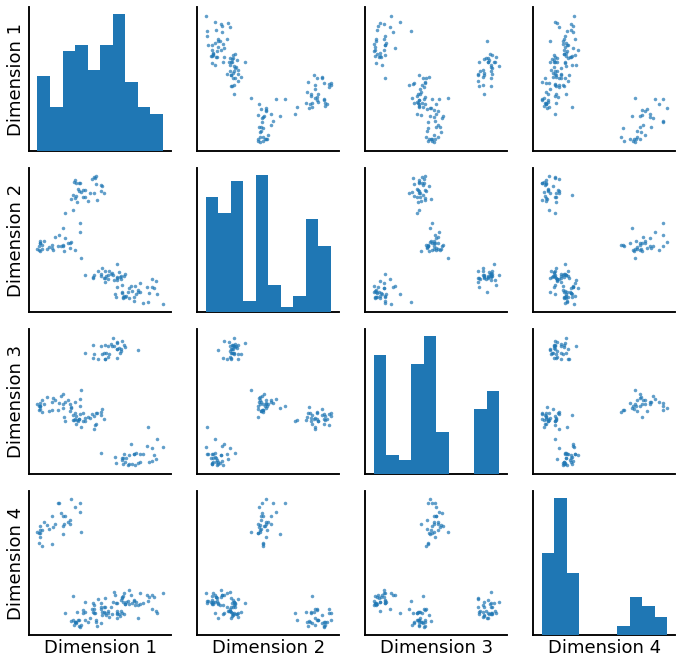

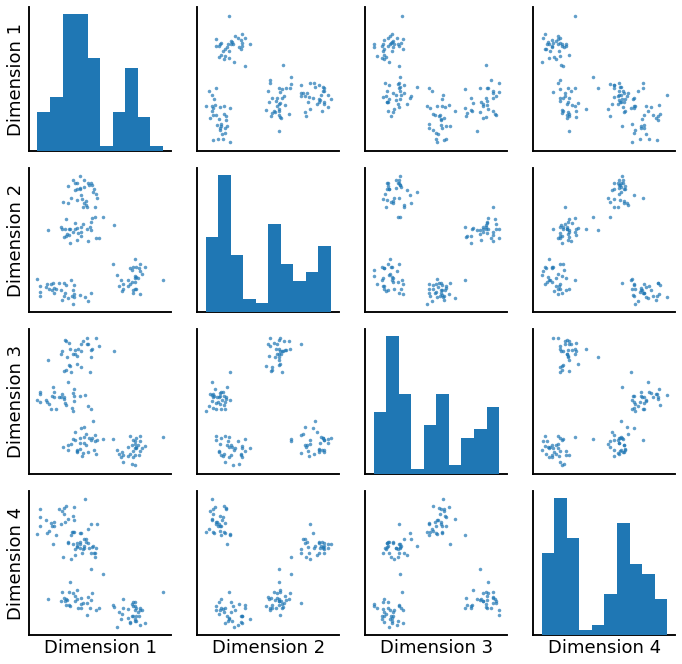

In [69]:
A3 = rdpg(X, loops=False,
          rescale=False,
          directed=False)
A4 = rdpg(X + np.random.normal(.05, .02, size=(X.shape)),
         loops=False,
         rescale=False,
         directed=False)

Xhat3 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A3)
Xhat4 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A4)

heatmap(A3)
heatmap(A4)

pairplot(Xhat3)
pairplot(Xhat4)

In [70]:
lpt = LatentPositionTest(n_bootstraps=100, n_components=n_components)
lpt.fit(A3, A4)
lpt.p_value_

0.15841584158415842

## Latent distribution test

In [71]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8888)

from graspy.inference import LatentDistributionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline

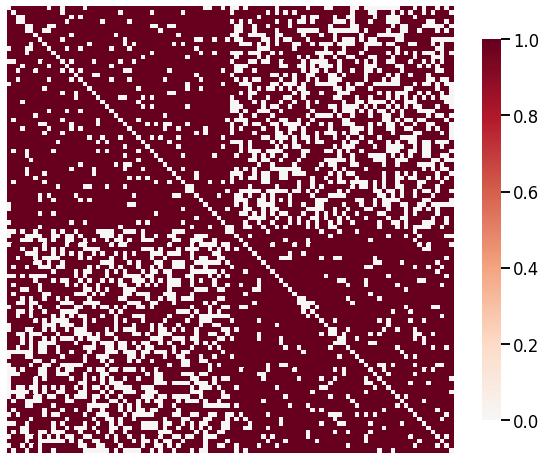

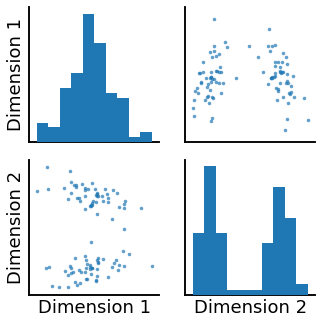

In [82]:
n_components=2
P = np.array([[.9, .6],
              [.6, .9]])
n = [50] * 2
G1 = sbm(n, P)

ase = AdjacencySpectralEmbed(n_components=n_components)
X1 = ase.fit_transform(G1)

heatmap(G1)
pairplot(X1)

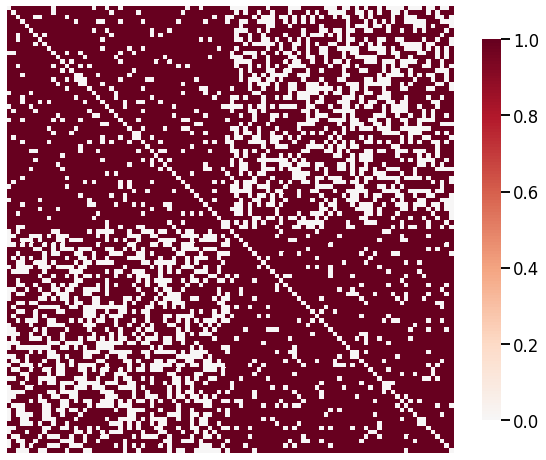

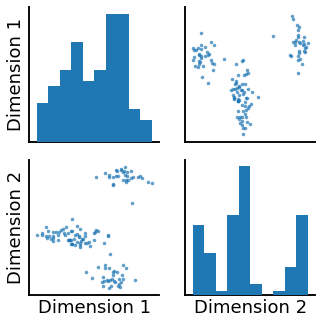

In [95]:
G1 = sbm(n, P)
X1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A2)

G2 = sbm(n, P)
X2 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A2)

heatmap(G2)
pairplot(X2)

In [99]:
ldt_dcorr = LatentDistributionTest("dcorr", metric="euclidean", n_bootstraps=100)
ldt_dcorr.fit(G1, G2)

/Users/alex/.pyenv/versions/38/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/alex/.pyenv/versions/38/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


LatentDistributionTest(metric=None, n_bootstraps=100, n_components=2,
                       pooled=False, size_correction=True,
                       test=<hyppo.ksample.ksamp.KSample object at 0x1456a2610>,
                       workers=1)

In [100]:
ldt_mgc = LatentDistributionTest("mgc", metric="euclidean", n_bootstraps=100)
ldt_mgc.fit(G1, G2)

/Users/alex/.pyenv/versions/38/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/Users/alex/.pyenv/versions/38/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


LatentDistributionTest(metric=None, n_bootstraps=100, n_components=2,
                       pooled=False, size_correction=True,
                       test=<hyppo.ksample.ksamp.KSample object at 0x1455f6910>,
                       workers=1)

In [101]:
ldt_dcorr.p_value_

0.84

In [102]:
ldt_mgc.p_value_

0.87

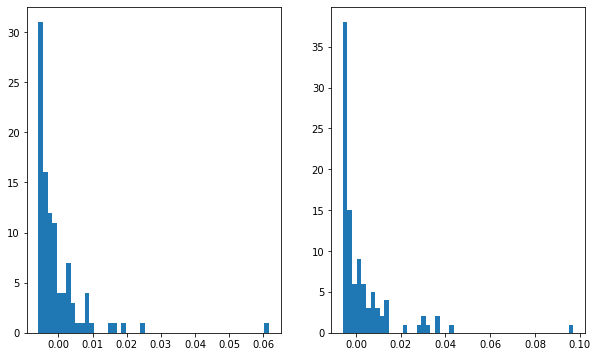

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(ldt_dcorr.null_distribution_, 50);
ax[1].hist(ldt_mgc.null_distribution_, 50);

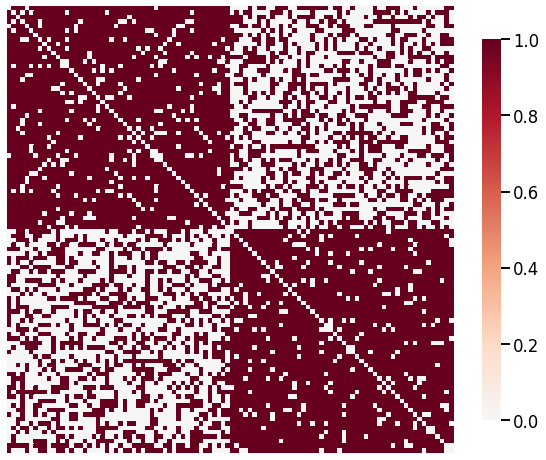

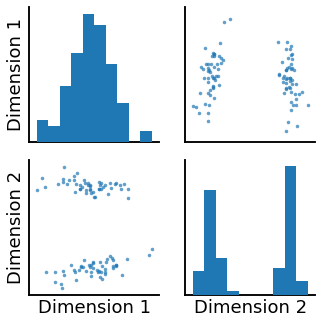

In [109]:
P2 = np.array([[.9, .4],
               [.4, .9]])

G3 = sbm(n, P2)
heatmap(G3)

X3 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(G3)
pairplot(X3)

In [114]:
ldt_dcorr = LatentDistributionTest("dcorr", n_bootstraps=100)
ldt_dcorr.fit(G1, G3)
ldt_dcorr.p_value_

/Users/alex/.pyenv/versions/38/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


0.03

In [115]:
ldt_mgc = LatentDistributionTest("mgc", n_bootstraps=100)
ldt_mgc.fit(G1, G3)
ldt_mgc.p_value_

/Users/alex/.pyenv/versions/38/lib/python3.8/site-packages/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


0.01

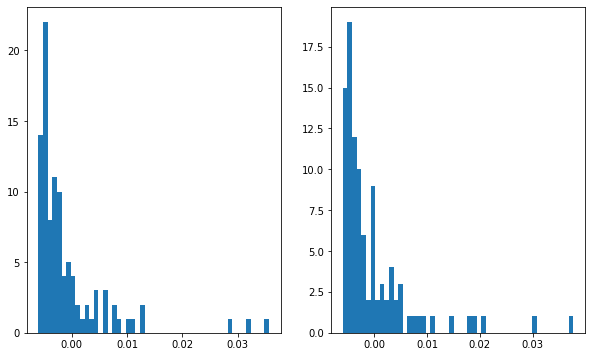

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(ldt_dcorr.null_distribution_, 50);
ax[1].hist(ldt_mgc.null_distribution_, 50);